# 图像特征-harris角点检测

进行x和y的移动，计算移动后的图像和原图像的差值，然后计算差值的协方差矩阵，然后计算矩阵的特征值，如果特征值都很大，那么这个点就是角点。

角点的特征更丰富，更具特性

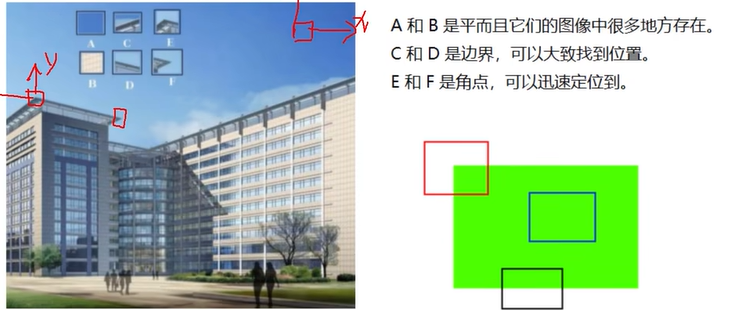

## 基本原理

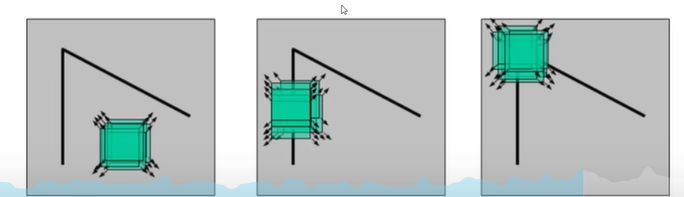

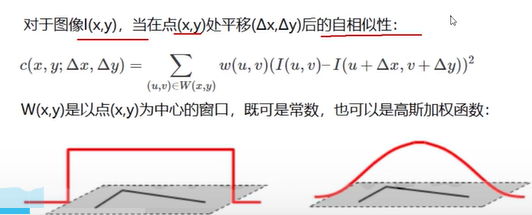

第一次是九个点，第二次也九个点，去滑动，作减法，得到一个矩阵，得到灰度变换。

减法是平移前后的变换结果，公式中平方项使得非负和结果扩大，w是窗口大小，w越大，检测的角点越少，w越小，检测的角点越多，w可以是常数，也可以是高斯窗口。

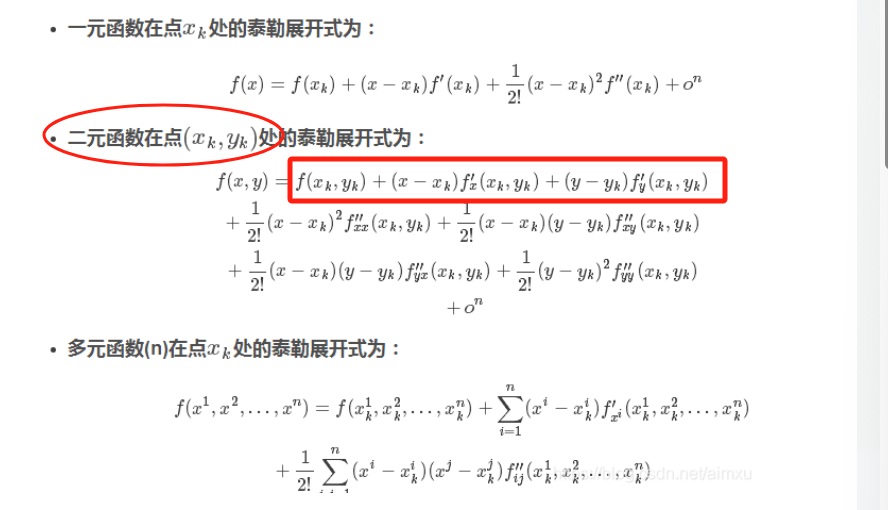
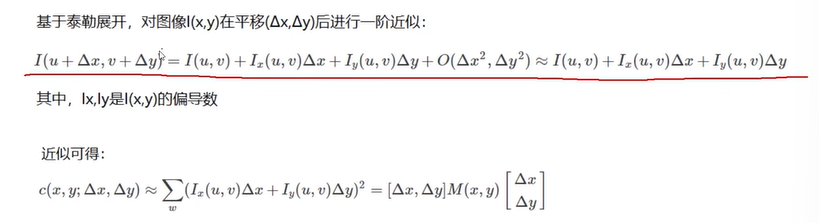

进行一阶泰勒展开

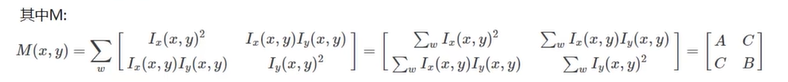

再化简，转换为矩阵形式方便后续求特征值

得到n行n列的是对成矩阵，进行对角化（找到特征向量使其可以对角化

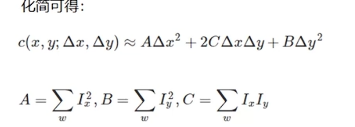

由m矩阵代到式子中得到的，对椭圆进行标准化处理，此时只有对角有值，那其他就0，不要带c的项

二次项函数本质上是椭圆函数，椭圆的轴就是特征值，椭圆越圆，特征值越大，椭圆越扁，特征值越小。

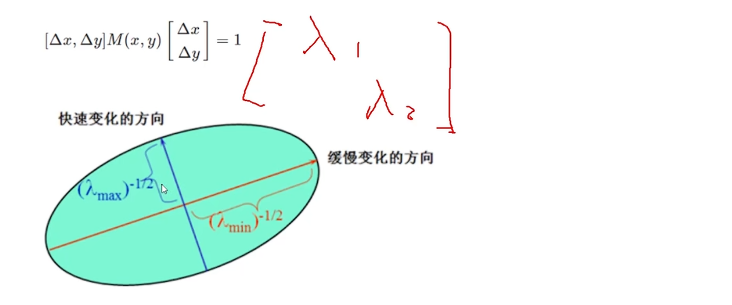

在一个轴变化很大，那么这个点就是边界；两个特征值较小且近似相等时，那么这是个平面；两个特征值较大且近似相等时，那么这是个角点

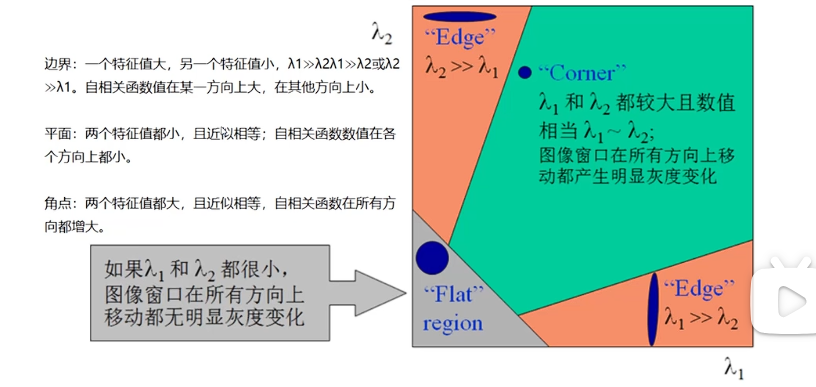

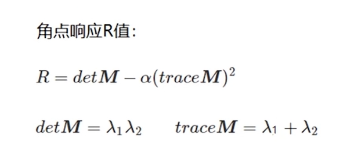

角点响应R值，对于平面，R值接近0；对于边界，R值接近0；对于角点，R值较大

总结：梯度（Ix，Iy）和梯度变化（IxIy，Ix^2+Iy^2）-->整合成矩阵，求特征值-->比较特征值大小-->NMS（非极大值抑制）-->R值阈值筛选

### cv2.cornerHarris()
* img: 输入图像，必须是灰度图
* blockSize: 窗口大小
* k: Harris角点检测方程中的自由参数，取值参数为[0,04,0.06]
* ksize: Sobel算子的大小
* borderType: 边界模式

In [2]:
import cv2
import  numpy as np

In [4]:
img=cv2.imread('chessboard.png')
print('img.shape',img.shape)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)
dst=cv2.cornerHarris(gray,2,3,0.04) # 角点检测
print('dst.shape',dst.shape)

img.shape (631, 626, 3)
dst.shape (631, 626)


In [7]:
# img[dst>0.01*dst.max()]=[0,0,255]
# 某一个点，如果这个点大于0.01*dst.max()，
# 那么这个点就是角点，用红色[0,0,255]标记出来
img[dst>1*dst.max()]=[0,0,255]

cv2.imshow('cornerHarris',img)
cv2.waitKey(0)
cv2.destroyAllWindows()